# Neurons selected by gradient magnitude

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
import copy
import matplotlib.pyplot as plt

In [2]:
model_params = (1, 1, 8, 2, 2)

eps = 1e-4
num_kept_neurons = 2
lr=0.005
runs=10

#0: loss: 0.2776722311973572 - size: 209
#1: loss: 0.41961634159088135 - size: 209
#2: loss: 0.427817165851593 - size: 209
#3: loss: 0.4305781424045563 - size: 209
#4: loss: 0.4287258982658386 - size: 209
#5: loss: 0.4092892110347748 - size: 209
#6: loss: 0.388378381729126 - size: 209
#7: loss: 0.2818405032157898 - size: 209
#8: loss: 0.29055631160736084 - size: 209
#9: loss: 0.2697468400001526 - size: 209


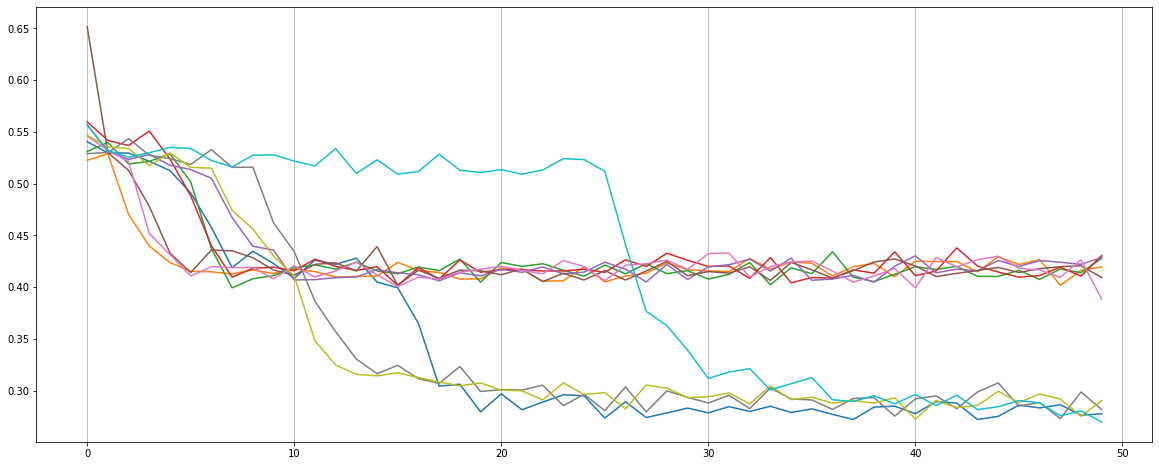

In [3]:
criterion = torch.nn.MSELoss()

def grow(model):
    model.grow(num_novel=4, eps_novel=eps, eps_split=eps)
    
    with model.new_grad_only():
        model.zero_grad()
        
        for _ in range(200): # batches
            train_x, train_y = toy_data()
            y = model(train_x)
            loss = criterion(y, train_y)

            loss.backward()

        selected = model.select(num_kept_neurons)

    model.degrow(*selected)

results = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

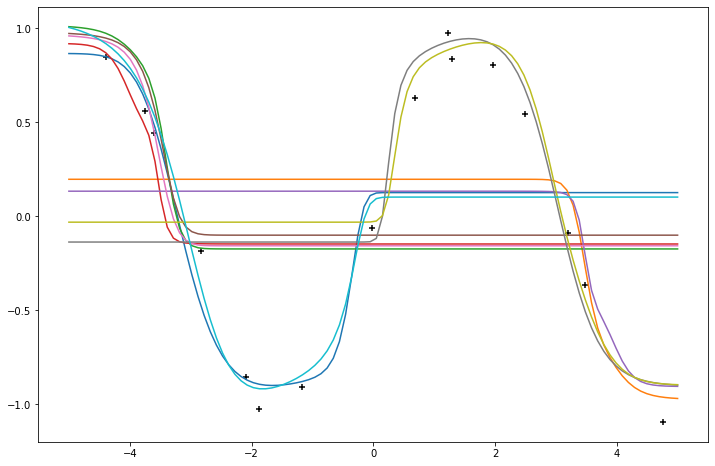

In [4]:
eval_series(results)